In [197]:
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

Importing data from disk

In [173]:
data_file = 'C:\\Users\\SONY\\Downloads\\Amazon_Unlocked_Mobile.csv'
data = pd.read_csv( data_file)

In [174]:
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [175]:
product_name = []
for item in data["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)
        

In [176]:
len(product_name) # 4410 phones

4410

There are 4410 phone models in this data set.

In [177]:
data["Brand Name"]
brands = []
for item in data["Brand Name"]:
    if (item in brands):
        continue
    else:
        brands.append(item)

In [178]:
len(brands) 

385

There are 385 brands in this data set.

Putting the data in a Pandas Dataframe.

In [179]:
data_df = pd.DataFrame(data) #converting the data into a pandas dataframe.

In [181]:
data_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [183]:
data_df = shuffle(data_df) #Shuffle Data 

In [184]:
data_df[:10]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
190549,HTC EVO Shift 4G Android Smartphone Blue - Sprint,HTC,129.52,1,This is the second of these phones I have boug...,2.0
123149,Blu LIFE 8 Unlocked (Orange),BLU,169.99,5,This phone works great! I love how sleek it is...,0.0
114765,BLU Dash L Unlocked Smartphone - Global GSM - ...,BLU,59.99,4,Good,0.0
239466,Life One X Quad Band Unlocked 32GB (White),BLU,150.00,2,This my second BLU phone an upgrade from Line ...,1.0
214517,LG G Vista 4G Unlocked 4G LTE Android 8MP Came...,LG,99.99,2,It wont work with tmobile because when the pho...,0.0
261581,"Nokia 6085 Unlocked Phone with Camera, Bluetoo...",Nokia,269.10,4,I bought this to replace a Motorola Razr which...,6.0
118233,BLU Energy X 2 - With 4000 mAh Super Battery -...,BLU,99.99,2,The phone is chunky because of the battery but...,1.0
248737,Motorola DROID Turbo - 32GB Android Smartphone...,NaN,159.72,4,"Still trying to figure everything out, but lov...",1.0
342613,Samsung Galaxy S4 I545 16GB Verizon Wireless +...,Samsung,176.07,4,Wonderful and would do it again!,0.0
381887,Samsung S5230 Tocco Lite Unlocked Phone with Q...,Samsung,55.55,4,This product is advertised as International Ve...,3.0


Cleaning data by removing rows having 'null' values.

In [185]:
#dropped rows having NaN values
data_df = data_df.dropna()

Taking 75 % of the data set as training data and 25 % as test data.

In [187]:
data_df_train = data_df[:(int)(0.75 * len(data_df))]
len(data_df_train)

250751

In [188]:
data_df_test = data_df[250751:]
len(data_df_test)

83584

In [228]:
data_df.describe() # General Description of data_df

,Price,Rating,Review Votes
count,334335.000000,334335.000000,334335.000000
mean,222.585019,3.824888,1.474515
std,283.139353,1.541203,9.217348
min,1.730000,1.000000,0.000000
25%,75.410000,3.000000,0.000000
50%,139.000000,5.000000,0.000000
75%,264.100000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


Top 10 brands in the data set having maximum Rating.

In [293]:
testing = pd.pivot_table(data_df,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing = testing.sort_values(by=('sum', 'Rating'), ascending = False)
testing.head(10)


sum                   mean             
            Rating Review Votes    Rating Review Votes
Brand Name                                            
Samsung     250452        96057  3.973032     1.523795
BLU         226085        54798  3.821069     0.926143
Apple       220286       112211  3.926597     2.000160
LG           83266        22929  3.848493     1.059762
BlackBerry   61892        21114  3.750121     1.279326
Nokia        61833        25684  3.824879     1.588767
Motorola     49564        23107  3.811736     1.777051
HTC          42873        12777  3.474030     1.035329
CNPGD        38233        20151  3.107869     1.638026
OtterBox     34556         2268  4.385279     0.287817

In [241]:
#Trying to find relation between price & rating 

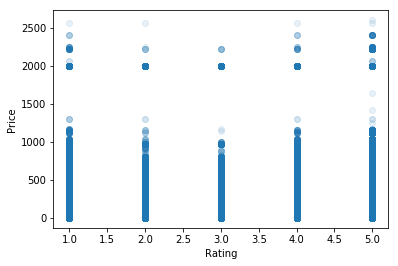

In [261]:
import matplotlib.pyplot as plt
ylabel = data_df["Price"]
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = data_df["Rating"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()

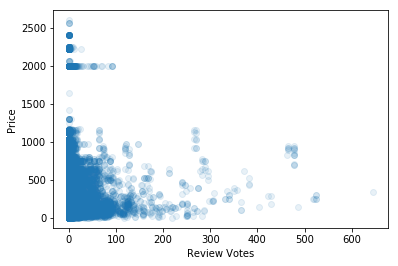

In [260]:
ylabel2 = data_df["Price"]
plt.ylabel("Price")
xlabel2 = data_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()

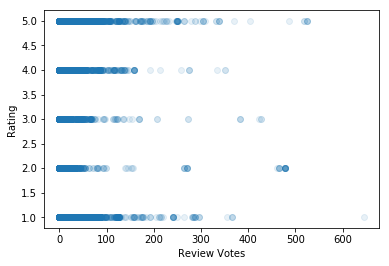

In [262]:
ylabel3 = data_df["Rating"]
plt.ylabel("Rating")
xlabel3 = data_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel3, ylabel3, alpha=0.1)
plt.show()

In [264]:
corr_matrix = data_df.corr()
corr_matrix["Rating"].sort_values(ascending = False)

Rating          1.000000
Price           0.073948
Review Votes   -0.046526
Name: Rating, dtype: float64

It is observed that Rating has a NEGATIVE CORRELATION with Review Votes = -0.046526

In [265]:
corr_matrix = data_df.corr()
corr_matrix["Price"].sort_values(ascending = False)

Price           1.000000
Rating          0.073948
Review Votes    0.022164
Name: Price, dtype: float64

It is observed that Rating has a POSITIVE CORRELATION with Price = 0.073948